# Рынок заведений общественного питания Москвы

Мы решили открыть небольшое кафе в Москве. Основная идея заключается в том, что гостей должны обслуживать роботы. Реализация проекта выглядит довольно дорого. Вместе с партнёрами мы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможем ли мы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?
Наша задача - подготовить исследование рынка. У нас есть открытые данные о заведениях общественного питания в Москве.


Для решения задачи нам необходимо выполнить следующие цели:

1) Загрузить данные и подготовить их к анализу

2) Анализ данных:

•	Исследуем соотношение видов объектов общественного питания по количеству. Построим график.

•	Исследуем соотношение сетевых и несетевых заведений по количеству. Построим график.

•	Выясним, для какого вида объекта общественного питания характерно сетевое распространение?

•	Выясним, что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

•	Выясним, для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Построим графики.

•	Выделим в отдельный столбец информацию об улице из столбца address .

•	Построим график топ-10 улиц по количеству объектов общественного питания. Воспользуемся внешней информацией и ответим на вопрос — в каких районах Москвы находятся эти улицы?

•	Найдем число улиц с одним объектом общественного питания. Воспользуемся внешней информацией и ответьтим на вопрос — в каких районах Москвы находятся эти улицы?

•	Посмотрим на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Выясним, какие закономерности можно выявить?

3) Подготовка презентации исследования для инвесторов

# Оглавление

1. [Шаг 1. Загружаем данные и готовим их к анализу](#one)
2. [Шаг 2. Анализ данных](#two)
    * [Исследуем соотношение видов объектов общественного питания по количеству. Построим график](#three)
    * [Исследуем соотношение сетевых и несетевых заведений по количеству. Построим график.](#four)
    * [Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?](#five)
    * [Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики.](#six)
    * [Выделите в отдельный столбец информацию об улице из столбца address.](#seven)
    * [Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?](#eight)
    * [Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?](#nine)
    * [Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?](#ten)
3. [Общий вывод](#eleven)
4. [Презентация](#twelve)

# Шаг 1. Загружаем данные и готовим их к анализу 
<a id='one'></a>

Для работы с данными нам необходимы определенные библиотеки, методы которых мы будем использовать. Импортируем их заранее.

In [2]:
# импортируем библиотеки
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
from plotly import graph_objects as go
!pip install plotly
from io import BytesIO
import requests
#установим библиотеку для визуализации
!pip install plotly

In [3]:
#встраиваем файл в проект
spreadsheet_id = '1UahMZ_BLP1zZAMNGgDP0U-xchjDxffAARv6xwyq-Inc'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
#присваиваем переменной значение датасета
rest_data = pd.read_csv(BytesIO(r.content))

Создадим собственную функцию для получения общей информации о датасете.

In [4]:
#создаем собственную функцию
def inform(dt):
    class font:
       BOLD = '\033[1m'
       END = '\033[0m'
    print('\n')
    print(font.BOLD + 'Первые пять строк таблицы:' + font.END)
    display(dt.head(5))
    print('\n'*2)
    print(font.BOLD + 'Общая информация о таблице:' + font.END)
    print('\n')
    dt.info()
    print('\n'*2)
    print(font.BOLD + 'Данные таблицы:' + font.END)
    display(dt.describe())
    print('\n'*2)
    print(f'Количество дубликатов: {dt.duplicated().sum()}')
    print('\n')
    print(font.BOLD + 'Количество пропусков в таблице::' + font.END)
    print(dt.isna().sum().sort_values(ascending=False))

In [5]:
#получаем общую информацию о датасете
inform(rest_data)



Первые пять строк таблицы:


id             object_name chain object_type  \
0  151635                 СМЕТАНА   нет        кафе   
1   77874                  Родник   нет        кафе   
2   24309         Кафе «Академия»   нет        кафе   
3   21894              ПИЦЦЕТОРИЯ    да        кафе   
4  119365  Кафе «Вишневая метель»   нет        кафе   

                                             address  number  
0         город Москва, улица Егора Абакумова, дом 9      48  
1  город Москва, улица Талалихина, дом 2/1, корпус 1      35  
2          город Москва, Абельмановская улица, дом 6      95  
3            город Москва, Абрамцевская улица, дом 1      40  
4  город Москва, Абрамцевская улица, дом 9, корпус 1      50




Общая информация о таблице:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB



Данные таблицы:


id        number
count   15366.000000  15366.000000
mean   119720.066901     59.547182
std     73036.130732     74.736833
min       838.000000      0.000000
25%     28524.000000     12.000000
50%    144974.500000     40.000000
75%    184262.250000     80.000000
max    223439.000000   1700.000000




Количество дубликатов: 0


Количество пропусков в таблице::
id             0
object_name    0
chain          0
object_type    0
address        0
number         0
dtype: int64


Мы видим, что пропусков в датасете нет, названия столбцев соответствуют правилам хорошего стиля, тип данных правильный и нет явных дубликатов. Однако дубликаты могут быть в связи с наличием названия, написанных прописными (большими буквами). Чтобы убедиться в чистоте данных, приведм все названия к одномуу нижнему регистру. Также уберем некоторые названия типов заведения и фразу "город Москва".

In [6]:
#приводим названия объектов общественного питания к нижнему регистру
rest_data['object_name']= rest_data['object_name'].str.lower() 
rest_data['object_name'] = rest_data['object_name'].str.replace(r'^кафе\s|^столовая|^буфет|^кафетерий\s|^кофейня\s|^пбо\s|^пиццерия\s|^предприятие быстрого обслуживания\s|^ресторан\s|^ресторан|^закусочная\s|^кафе$|^суши$|^пекарня$|^шаурма$|^чайхона$|^кафе пекарня$|кулинарная лавка', '', regex = True)
rest_data['object_name'] = rest_data['object_name'].str.replace('«', '') 
rest_data['object_name'] = rest_data['object_name'].str.replace('»', '')
rest_data['address'] = rest_data['address'].str.replace('город Москва,', '')


#удаляем пробелы в начале строки
rest_data['object_name'] = rest_data['object_name'].str.lstrip()
#удаляем пробелы в конце строки
rest_data['object_name'] = rest_data['object_name'].str.rstrip()

#удаляем пробелы в начале строки
rest_data['address'] = rest_data['address'].str.lstrip()
#удаляем пробелы в конце строки
rest_data['address'] = rest_data['address'].str.rstrip()

In [7]:
#теперь считаем количество неявных дубликатов
rest_data.duplicated().sum()

0

Дубликатов не обнаружено. Посмотрим, что из себя представляет получившаяся таблица. Однако у нас есть столбец id, который постфактум делает строку уникальной, поэтом рассчитаем дубликаты без него.

In [8]:
#считаем дубликаты
rest_data[['object_name', 'chain', 'object_type', 'address', 'number']].duplicated().sum()

87

In [9]:
#избавляемся от дубликатов
rest_data_d = rest_data[['object_name', 'chain', 'object_type', 'address', 'number']].drop_duplicates()
rest_data_d['index'] = rest_data_d.index
rest_data['index'] = rest_data.index
rest_data = rest_data[['index', 'id']].merge(rest_data_d, on ='index')
rest_data = rest_data.drop(['index'], axis=1)
rest_data

id      object_name chain object_type  \
0      151635          сметана   нет        кафе   
1       77874           родник   нет        кафе   
2       24309         академия   нет        кафе   
3       21894       пиццетория    да        кафе   
4      119365  вишневая метель   нет        кафе   
...       ...              ...   ...         ...   
15274  208537      шоколадница    да        кафе   
15275  209264      шоколадница    да        кафе   
15276  209186      шоколадница    да        кафе   
15277  221900      шоколадница    да        кафе   
15278  222535      шоколадница    да        кафе   

                                                 address  number  
0                           улица Егора Абакумова, дом 9      48  
1                    улица Талалихина, дом 2/1, корпус 1      35  
2                            Абельмановская улица, дом 6      95  
3                              Абрамцевская улица, дом 1      40  
4                    Абрамцевская улица, дом 9, корпус 1      50  
...                                                  ...     ...  
15274                     3-й Крутицкий переулок, дом 18      50  
15275                         улица Земляной Вал, дом 33      10  
15276                         улица Земляной Вал, дом 33      20  
15277  поселение Московский, Киевское шоссе, 22-й кил...      36  
15278                           Ходынский бульвар, дом 4      10  

[15279 rows x 6 columns]

In [10]:
#смотрим на получившийся результат
rest_data[['object_name', 'chain', 'object_type', 'address', 'number']].duplicated().sum()

0

Теперь-то можно с уверенностью сказать, что дубликатов нет в датасете

In [11]:
#выводим датасет на экран
rest_data.head(5)

id      object_name chain object_type  \
0  151635          сметана   нет        кафе   
1   77874           родник   нет        кафе   
2   24309         академия   нет        кафе   
3   21894       пиццетория    да        кафе   
4  119365  вишневая метель   нет        кафе   

                               address  number  
0         улица Егора Абакумова, дом 9      48  
1  улица Талалихина, дом 2/1, корпус 1      35  
2          Абельмановская улица, дом 6      95  
3            Абрамцевская улица, дом 1      40  
4  Абрамцевская улица, дом 9, корпус 1      50

Согласно документации к данным, датасет rest_data состоит из 6 столбцев:

•	`id` — идентификатор объекта;

•	`object_name` — название объекта общественного питания;

•	`chain` — сетевой ресторан;

•	`object_type` — тип объекта общественного питания;

•	`address` — адрес;

•	`number` — количество посадочных мест.


# Шаг 2. Анализ данных 
<a id='two'></a>

## Исследуем соотношение видов объектов общественного питания по количеству. Построим график.
<a id='three'></a>

Чтобы исследовать соотношение видов объектов общественного питания по количеству, сгруппируем данные по виду объекта и посчитаем количество заведений для каждого вида.

In [12]:
#строим датасет с соотношением видов объектов общественного питания по количеству
obj_df = rest_data.groupby('object_type', as_index=False)['id'].count().sort_values(by ="id", ascending =False)
#рассчитываем процентное содержание каждого вида объекта
obj_df['procent'] = round((obj_df['id']/(sum(obj_df['id']))*100), 2)
#выводим датасет на экран
obj_df

object_type    id  procent
3                               кафе  6071    39.73
8                           столовая  2583    16.91
7                           ресторан  2282    14.94
6  предприятие быстрого обслуживания  1897    12.42
0                                бар   855     5.60
1                              буфет   576     3.77
4                          кафетерий   395     2.59
2                         закусочная   347     2.27
5          магазин (отдел кулинарии)   273     1.79

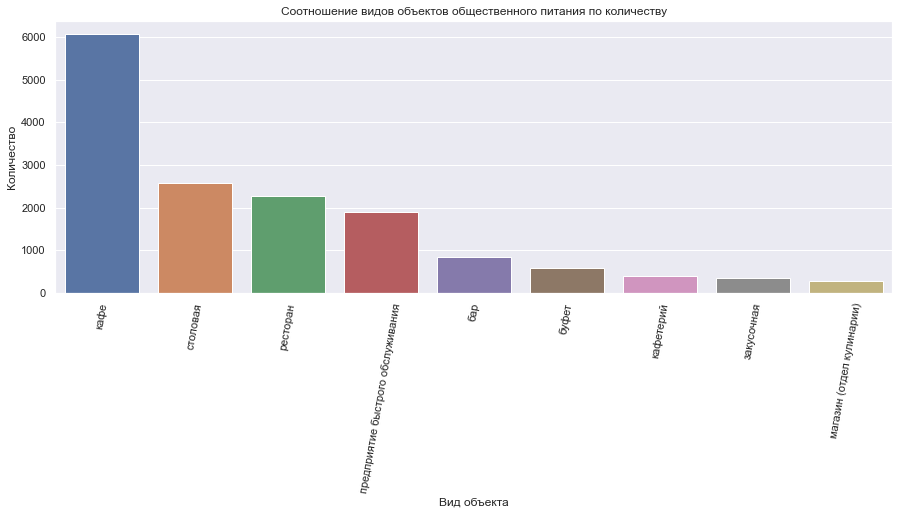

In [13]:
# задаём сетку отрисовки графиков
plt.figure(figsize=(15, 5))
sns.set(style="darkgrid")
ax = sns.barplot(x = 'object_type', y = 'id', data=obj_df, ci=None) 
plt.title("Cоотношение видов объектов общественного питания по количеству")
plt.xlabel("Вид объекта")
plt.ylabel("Количество")
plt.xticks(rotation = 80) 
plt.show()

### Вывод:

Мы видим, что в Москве больше всего заведений  типа кафе. В процентном соотношений кафе занимают около 40% ото всех объектов общественного питания.  В 2 раза меньше, чем кафе, в Москве находится объектов общественного питания, расположенных по количеству на 2 месте, а именно столовых (около 17%). Тройку лидеров по количеству занимает такой объект, как рестораны (15%). Меньше всего же магазинов с отделами кулинарии (1.79%), кафетериев и закусочных (по 2,5% примерно).

## Исследуем соотношение сетевых и несетевых заведений по количеству. Построим график.
<a id='four'></a>

Сгруппируем данные по признаку сетевых/несетевых заведений и рассчитаем общее количество для каждой группы, а также процентное соотношение.

In [14]:
#строим датасет для определения соотношения сетевых и несетевых заведений
chain_data = rest_data.pivot_table(index='chain', values='id', aggfunc ='count').sort_values(by ="id", ascending =False)
#рассчитываем процентное содержание каждого вида объекта
chain_data['procent'] = round((chain_data['id']/(sum(chain_data['id']))*100), 2)
#выводим датасет на экран
chain_data

id  procent
chain                
нет    12315     80.6
да      2964     19.4

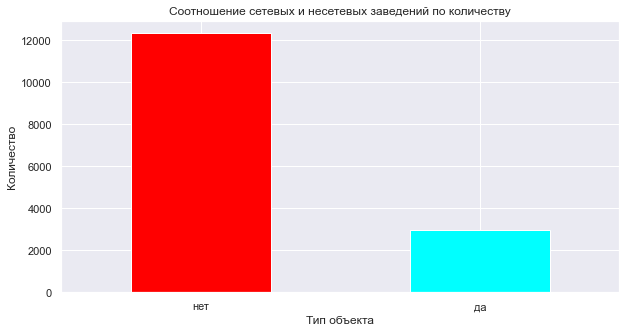

In [15]:
#строим график
my_color =['red', 'aqua']
chain_data.plot(y ='id', kind='bar', legend=False, figsize = (10, 5), color = my_color)
plt.title("Cоотношение сетевых и несетевых заведений по количеству")
plt.xlabel("Тип объекта")
plt.ylabel("Количество")
plt.xticks(rotation = 0) 
plt.show()

Также посмотрим на то, как распределены сетевые и несетевые заведения в зависимости от типа заведения.

In [16]:
#строим датасет для определения соотношения сетевых и несетевых заведений
chain_data2 = rest_data.pivot_table(index=['object_type', 'chain'], values='id', aggfunc ='count')
#выводим датасет на экран
chain_data2

id
object_type                       chain      
бар                               да       37
                                  нет     818
буфет                             да       11
                                  нет     565
закусочная                        да       56
                                  нет     291
кафе                              да     1396
                                  нет    4675
кафетерий                         да       52
                                  нет     343
магазин (отдел кулинарии)         да       78
                                  нет     195
предприятие быстрого обслуживания да      788
                                  нет    1109
ресторан                          да      543
                                  нет    1739
столовая                          да        3
                                  нет    2580

In [17]:
rest_datas = rest_data.groupby(['object_type', 'chain'], as_index=False)['id'].count()
rest_datas.columns = ['object_type', 'chain', 'count']
rest_datas

object_type chain  count
0                                 бар    да     37
1                                 бар   нет    818
2                               буфет    да     11
3                               буфет   нет    565
4                          закусочная    да     56
5                          закусочная   нет    291
6                                кафе    да   1396
7                                кафе   нет   4675
8                           кафетерий    да     52
9                           кафетерий   нет    343
10          магазин (отдел кулинарии)    да     78
11          магазин (отдел кулинарии)   нет    195
12  предприятие быстрого обслуживания    да    788
13  предприятие быстрого обслуживания   нет   1109
14                           ресторан    да    543
15                           ресторан   нет   1739
16                           столовая    да      3
17                           столовая   нет   2580

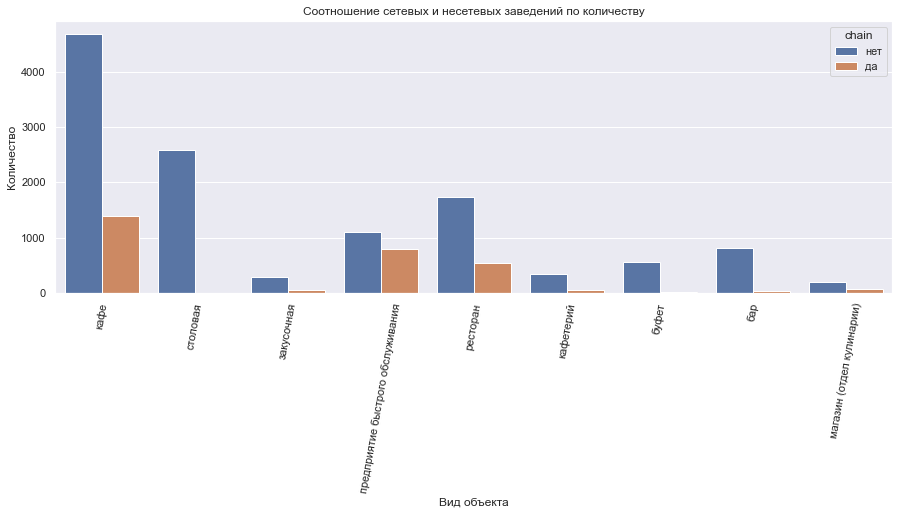

In [18]:
#строим датасет для определения соотношения сетевых и несетевых заведений
chain_data2 = rest_data.pivot_table(index=['object_type', 'chain'], values='id', aggfunc ='count')

#строим график
plt.figure(figsize=(15, 5))
sns.barplot(x = 'object_type', y = 'id', hue = 'chain', data=rest_data, ci=None, estimator=len ) 
plt.title("Соотношение сетевых и несетевых заведений по количеству")
plt.xlabel("Вид объекта")
plt.ylabel("Количество")
plt.xticks(rotation = 80) 
plt.show()

Теперь построим график соотношения процентов сетевых и несетевых заведений

In [19]:
#строим датасет с процентом сетевых заведений для каждого типа заведения
lists2 = []
values = []
e = []
lists = list(rest_datas['object_type'].unique())
for x in lists:
    y = rest_datas.query('object_type == @x')
    lists2.append(y['count'].sum())
lists3 = list(rest_datas.query('chain == "да"')['count'])
for z in range(len(lists3)):
    n = round(((lists3[z]/lists2[z])*100),2)
    values.append(n)
for x in range(len(lists)):
    e.append([lists[x], values[x]])
header = ['object_type', 'chain_procent']
datas = (pd.DataFrame(data=e, columns=header)).sort_values(by ='chain_procent', ascending = False)
datas

object_type  chain_procent
6  предприятие быстрого обслуживания          41.54
5          магазин (отдел кулинарии)          28.57
7                           ресторан          23.79
3                               кафе          22.99
2                         закусочная          16.14
4                          кафетерий          13.16
0                                бар           4.33
1                              буфет           1.91
8                           столовая           0.12

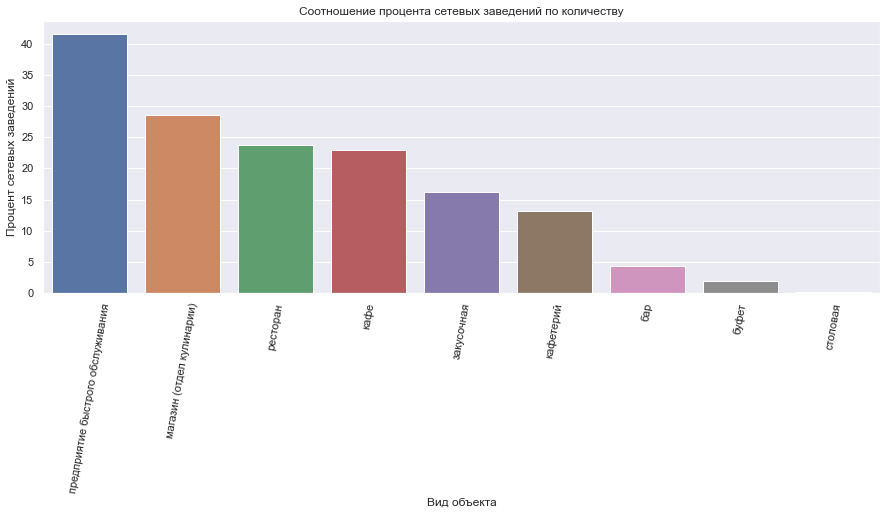

In [20]:
#строим график
plt.figure(figsize=(15, 5))
sns.barplot(x = 'object_type', y = 'chain_procent', data=datas, ci=None) 
plt.title("Соотношение процента сетевых заведений по количеству")
plt.xlabel("Вид объекта")
plt.ylabel("Процент сетевых заведений")
plt.xticks(rotation = 80) 
plt.show()

### Вывод:

Мы видим, что преобладающее число заведений относятся к несетевым. Около 80% заведений в москве - несетевые. В разбивке на вид заведения мы видим, что больше всего сетевых завдений у кафе, слодом идут предприятия быстрого питания и рестораны. Все остальные виды практически не имеют сетевых заведений. Ни один вид заведения не имеет сетевых заведений больше, чем несетевых. Кафе являются абсолютным лидером и по количеству несетевых заведений, за ними идут столовы и рестораны. Интересная ситуация у предприятий быстрого обслуживания - у них практически одинаковое количество сетевых и несетевых заведений.

В разбивке на проценты мы видим, что чуть больше 20% кафе в Москве являются сетевыми. Больше же всего сетевых заведений среди предприятий быстрого обслуживания(практически 50%), а меньше всего - среди столовых (практически 0%)

## Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?
<a id='five'></a>

Сначала отберем только сетевые заведения. Затем посмотрим на распределения количества посадочных мест, чтобы категоризировать в дальнейшем данные.

In [21]:
#делаем срез для сетевых заведений
chain_df = rest_data.query('chain == "да"')

In [22]:
#получаем данные о распределении
chain_df['number'].describe()

count    2964.000000
mean       52.981107
std        57.152817
min         0.000000
25%        15.000000
50%        40.000000
75%        72.000000
max       580.000000
Name: number, dtype: float64

Теперь нам нужно узнать, что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест. Для этого мы рассчитаем количество сетевых заведений и среднее число посадчоных мест для них, а затем посмотрим на распределение.

In [23]:
#получаем данные о среднем количестве мест для каждого сетевого заведения
number_df = chain_df.groupby('object_name', as_index=False)['number'].mean().sort_values(by ="number", ascending =False)
#получаем данные о количестве сетевых заведений
number_df2 = chain_df.groupby('object_name', as_index=False)['id'].count().sort_values(by ="id", ascending =False)
#объединяем датасеты
number_df3 = number_df.merge(number_df2, on ='object_name')
#выводим датасет на экран
number_df3

object_name  number  id
0           чешская пивная козловица   306.0   1
1               якитория и ян примус   282.0   1
2                     старина миллер   280.0   1
3                           пражечка   266.0   1
4                       чайхана урюк   250.0   1
..                               ...     ...  ..
433                     tutti frutti     0.0   1
434  точка продажи готовой еды милти     0.0   2
435        магазин готовой еды милти     0.0   3
436                           васаби     0.0   1
437        пончиковое кафе икеа ikea     0.0   1

[438 rows x 3 columns]

Теперь посмотрим на то, как обстоят дела с данными

In [24]:
#получаем информацию о столбце number
number_df.describe()

number
count  438.000000
mean    57.344708
std     52.549552
min      0.000000
25%     20.000000
50%     43.500000
75%     80.000000
max    306.000000

Теперь, имея в запасе эти данные можно категоризировать данные. 

Выделим следующие категории:

`мало посадочных мест` - до 57 мест

`много посадочных мест` -свыше 57

Теперь построим распределение, где по оси Y будет количество заведений, а по оси X - их среднее число посадочных мест.

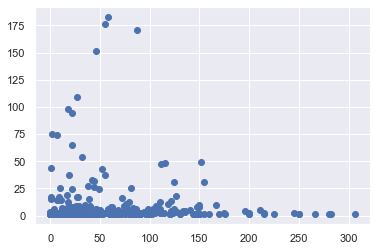

In [25]:
#посмотрим на распределение
plt.scatter(number_df3['number'], number_df3['id'])

Мы видим, что в Москве крайне мало сетевых заведений с большим количеством мест. Для подтверждения данной теории сгруппируем данные по количеству посадочных мест и рассчитаем количество сетевых заведений для каждой группы посадочных мест. Так мы увидим, сколько сетевых заведений имеют определенное количество посадочных мест.

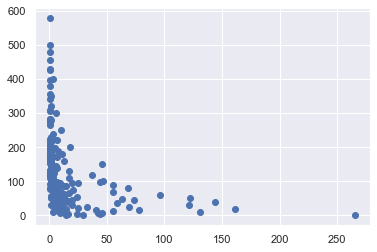

In [26]:
#смотрим на расперделение данных
chain_df3 = chain_df.groupby('number', as_index=False)['id'].count()
plt.scatter(chain_df3['id'], chain_df3['number']) 

Гипотеза подтвердилась - в Москве не более сотни заведений относятся к группе посадочных мест более 50.

In [27]:
#рассчитываем 
procen1 = round(len(number_df.query('number <= 57'))/len(number_df), 2)
procen2 = round(len(number_df.query('number > 57'))/len(number_df), 2)
print('Процент сетевых заведений с большим количеством мест:', procen2)
print('Процент сетевых заведений с небольшим количеством мест:', procen1)

Процент сетевых заведений с большим количеством мест: 0.39
Процент сетевых заведений с небольшим количеством мест: 0.61


Мы видим, что более 60% сетей заведений имеют небольшое количество посадочных мест (до 57)

In [28]:
#строим собственную функцию для категоризации
def counts(row):
    if row <= 57:
        return 'мало посадочных мест'
    warnings.filterwarnings("ignore")
    return 'много посадочных мест'
#применяем собственную функцию к столбцу с доходами, а результат помещаем в новый столбец
chain_df['category'] = chain_df['number'].apply(counts)    
#выводим на экран уникальные значения полученных категорий
chain_df['category'].value_counts()

мало посадочных мест     1997
много посадочных мест     967
Name: category, dtype: int64

С отдельно взятыми заведениями дела обстоят еще интереснее - сетевых заведений с небольшим количеством мест в 2 раза больше, чем заведений с большим количеством мест

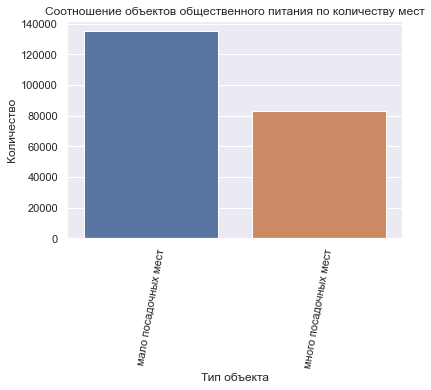

In [29]:
# строим график
sns.barplot(x = 'category', y = 'id', data=chain_df, ci=None) 
plt.title("Cоотношение объектов общественного питания по количеству мест")
plt.xlabel("Тип объекта")
plt.ylabel("Количество")
plt.xticks(rotation = 80) 
plt.show()

Также посмотрим на распределение по типам заведений

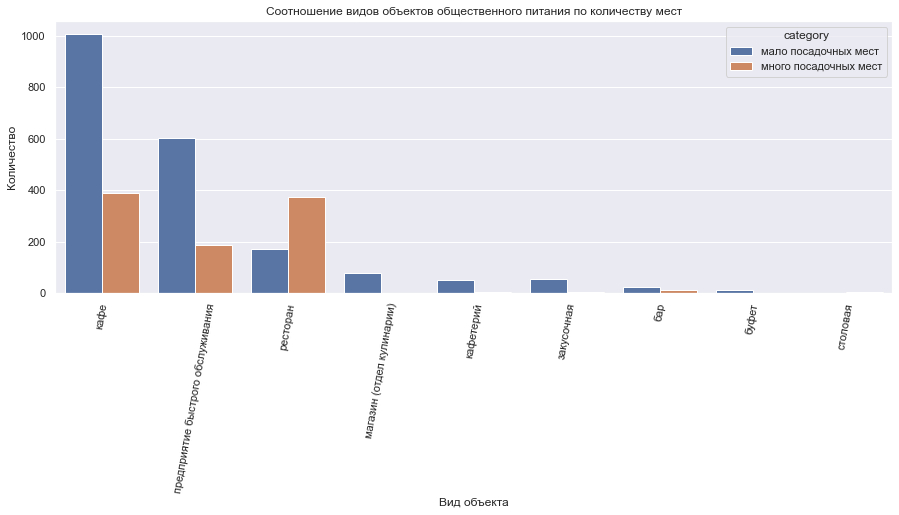

In [30]:
# строим график
plt.figure(figsize=(15, 5))
sns.barplot(x = 'object_type', y = 'id', hue = 'category', data=chain_df, ci=None, estimator=len ) 
plt.title("Cоотношение видов объектов общественного питания по количеству мест")
plt.xlabel("Вид объекта")
plt.ylabel("Количество")
plt.xticks(rotation = 80) 
plt.show()

### Вывод:

Проанализировав данные, можно сделать вывод о том, что для сетевых заведений Москву характерно `мало заведений с большим числом посадочных мест в каждом виде заведения`. Более половины всех сетей заведений в Москве предпочитают количество посадочных мест в количестве меньше среднего (57). Отдельно взятых сетевых заведений с большим количеством мест в 2 раза меньше, чем тех, в которых небольшое количество мест. Что касается типа заведений, то только среди ресторанов много заведений с большим количеством мест.

## Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики.
<a id='six'></a>

Сначала построим сводную таблицу для каждого вида заведения с указанием среднего количества посадочных мест, а затем построим график.

In [31]:
#строим датасет для определения соотношения сетевых и несетевых заведений
df = rest_data.pivot_table(index='object_type', values='number', aggfunc ='mean').sort_values(by ="number", ascending =False)
#выводим датасет на экран
df

number
object_type                                  
столовая                           130.291521
ресторан                            96.884750
буфет                               51.425347
бар                                 43.533333
кафе                                39.785703
предприятие быстрого обслуживания   20.808645
кафетерий                            9.184810
закусочная                           7.870317
магазин (отдел кулинарии)            5.589744

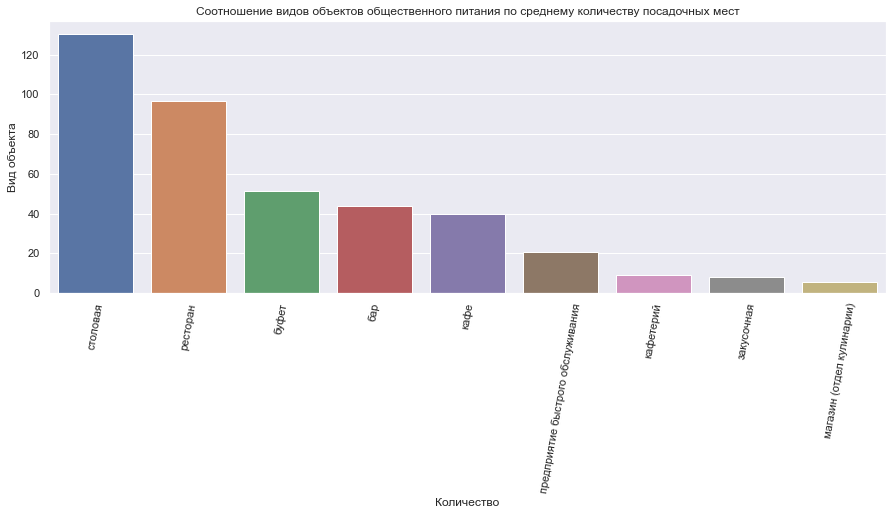

In [32]:
# задаём сетку отрисовки графиков
plt.figure(figsize=(15, 5))
lists = df.index
sns.barplot(x = 'object_type', y = 'number',  data=rest_data, ci=None, order=lists) 
plt.title("Cоотношение видов объектов общественного питания по среднему количеству посадочных мест")
plt.xlabel("Количество")
plt.ylabel("Вид объекта")
plt.xticks(rotation = 80) 
plt.show()

Построим ящик с усами для того, чтобы иметь представление о распределении количества посадочных мест

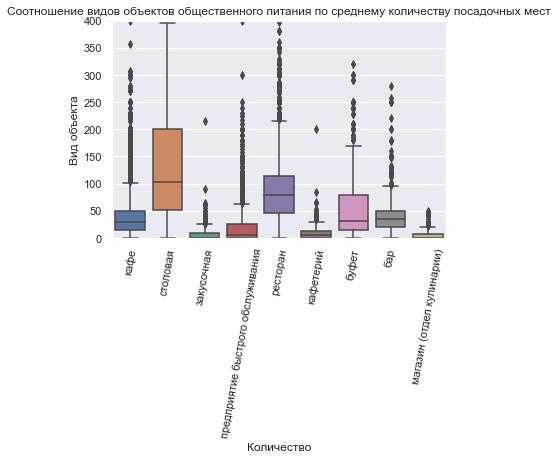

In [33]:
#ящик с усами
sns.boxplot(x='object_type', y='number', data=rest_data) 
plt.title("Cоотношение видов объектов общественного питания по среднему количеству посадочных мест")
plt.xlabel("Количество")
plt.ylabel("Вид объекта")
plt.xticks(rotation = 80) 
plt.ylim(0, 400) 
plt.show()

Кафе - границей нормального распределения является 103 посадочных места, а большая часть значений лежит в дипазоне от 20 до 50 посадочных мест примерно.

Столовая - границей нормального распределения является 400 посадочных мест, а большая часть значений лежит в дипазоне от 50 до 200 посадочных мест примерно

Закусочная - границей нормального распределения является 25 посадочных мест, а большая часть значений лежит в дипазоне от 0 до 10 посадочных мест примерно

Предприя быстрого обслуживания - границей нормального распределения является 62 посадочных мест, а большая часть значений лежит в дипазоне от 0 до 25 посадочных мест примерно

Ресторан - границей нормального распределения является 219 посадочных мест, а большая часть значений лежит в дипазоне от 46 до 115 посадочных мест примерно

Кафетерий - границей нормального распределения является 30 посадочных мест, а большая часть значений лежит в дипазоне от 0 до 12 посадочных мест примерно

Буфет - границей нормального распределения является 173 посадочных мест, а большая часть значений лежит в дипазоне от 15 до 12 посадочных мест примерно

Бар - границей нормального распределения является 96 посадочных мест, а большая часть значений лежит в дипазоне от 20 до 50 посадочных мест примерно

Магазин - границей нормального распределения является 20 посадочных мест, а большая часть значений лежит в дипазоне от 0 до 9 посадочных мест примерно

### Вывод:

Мы видим, что самое больше среднее количество посадочных мест предоставляет столовая (в среднем 130 посадочных мест). Рестораны идут сразу же за столовыми с 97 посадочными местами в среднем. Буфет закрывает тройку, имея 51 посадочное место.

Меньше всего посадочных мест в кафетериях, закусочных и магазинах с отделами кулинарии. В данных заведениях среднее число посадочных мест колеблется от 5 до 9.

Интересующая нас группа заведений - кафе, имеет в среднем 39 посадочных мест, что в принципе ниже среднего числа посадочных мест среди всех заведений и близко к медаинному количеству посадочных мест для заведений. Также говоря о кафе мы пришли к выводу о том, что для кафе границей нормального распределения является 103 посадочных места, а большая часть значений лежит в дипазоне от 20 до 50 посадочных мест примерно.

## Выделите в отдельный столбец информацию об улице из столбца address.
<a id='seven'></a>

Для того, чтобы это сделать, превратим адрес в список, где элементы списка станут разделены запятыми. После этого оставим только элементы с индексом 0. Поскольку мы заранее убрали все города, то на данном месте должна стоять именно улица

In [34]:
#смотрим на первоначальную таблицу
rest_data

id      object_name chain object_type  \
0      151635          сметана   нет        кафе   
1       77874           родник   нет        кафе   
2       24309         академия   нет        кафе   
3       21894       пиццетория    да        кафе   
4      119365  вишневая метель   нет        кафе   
...       ...              ...   ...         ...   
15274  208537      шоколадница    да        кафе   
15275  209264      шоколадница    да        кафе   
15276  209186      шоколадница    да        кафе   
15277  221900      шоколадница    да        кафе   
15278  222535      шоколадница    да        кафе   

                                                 address  number  
0                           улица Егора Абакумова, дом 9      48  
1                    улица Талалихина, дом 2/1, корпус 1      35  
2                            Абельмановская улица, дом 6      95  
3                              Абрамцевская улица, дом 1      40  
4                    Абрамцевская улица, дом 9, корпус 1      50  
...                                                  ...     ...  
15274                     3-й Крутицкий переулок, дом 18      50  
15275                         улица Земляной Вал, дом 33      10  
15276                         улица Земляной Вал, дом 33      20  
15277  поселение Московский, Киевское шоссе, 22-й кил...      36  
15278                           Ходынский бульвар, дом 4      10  

[15279 rows x 6 columns]

In [35]:
#превращаем строеки в список
rest_data['street'] = rest_data['address'].str.split(',')

Если в столбце `street` есть слово "улица", то мы выводим именно ее. Если нет, то мы не трогаем строку.

In [36]:
#выводим улицы
for x in range(len(rest_data['street'])):
    for y in range(len(rest_data['street'][x])):
        if 'улица' in rest_data['street'][x][y]: 
            rest_data['street'][x] = rest_data['street'][x][y]
rest_data                

id      object_name chain object_type  \
0      151635          сметана   нет        кафе   
1       77874           родник   нет        кафе   
2       24309         академия   нет        кафе   
3       21894       пиццетория    да        кафе   
4      119365  вишневая метель   нет        кафе   
...       ...              ...   ...         ...   
15274  208537      шоколадница    да        кафе   
15275  209264      шоколадница    да        кафе   
15276  209186      шоколадница    да        кафе   
15277  221900      шоколадница    да        кафе   
15278  222535      шоколадница    да        кафе   

                                                 address  number  \
0                           улица Егора Абакумова, дом 9      48   
1                    улица Талалихина, дом 2/1, корпус 1      35   
2                            Абельмановская улица, дом 6      95   
3                              Абрамцевская улица, дом 1      40   
4                    Абрамцевская улица, дом 9, корпус 1      50   
...                                                  ...     ...   
15274                     3-й Крутицкий переулок, дом 18      50   
15275                         улица Земляной Вал, дом 33      10   
15276                         улица Земляной Вал, дом 33      20   
15277  поселение Московский, Киевское шоссе, 22-й кил...      36   
15278                           Ходынский бульвар, дом 4      10   

                                                  street  
0                                  улица Егора Абакумова  
1                                       улица Талалихина  
2                                   Абельмановская улица  
3                                     Абрамцевская улица  
4                                     Абрамцевская улица  
...                                                  ...  
15274                  [3-й Крутицкий переулок,  дом 18]  
15275                                 улица Земляной Вал  
15276                                 улица Земляной Вал  
15277  [поселение Московский,  Киевское шоссе,  22-й ...  
15278                        [Ходынский бульвар,  дом 4]  

[15279 rows x 7 columns]

Однако у нас останутся те объекты, которые не имеют слова "Улица". Посмотрим, сколько таких адресов.

In [37]:
for x in range(len(rest_data['street'])):
    if 'улица' not in rest_data['street'][x]: 
        print(rest_data['street'][x])

['переулок Сивцев Вражек', ' дом 6/2']
['Филипповский переулок', ' дом 15/5']
['Алтуфьевское шоссе', ' дом 14']
['Алтуфьевское шоссе', ' дом 14']
['Алтуфьевское шоссе', ' дом 42Б']
['Алтуфьевское шоссе', ' дом 56']
['Алтуфьевское шоссе', ' дом 56']
['Алтуфьевское шоссе', ' дом 102Б']
['Анадырский проезд', ' дом 55']
['проспект Андропова', ' дом 17', ' корпус 2']
['проспект Андропова', ' дом 26']
['проспект Андропова', ' дом 30']
['проспект Андропова', ' дом 35А']
['проспект Андропова', ' дом 38', ' корпус 2']
['Астраханский переулок', ' дом 1/15']
['Астраханский переулок', ' дом 5/9']
['Балаклавский проспект', ' дом 48', ' корпус 1']
['Балаклавский проспект', ' дом 54']
['1-й Балтийский переулок', ' дом 3/25']
['Бережковская набережная', ' дом 8']
['Бережковская набережная', ' дом 14']
['Бескудниковский бульвар', ' дом 40', ' корпус 3']
['Бескудниковский бульвар', ' дом 57', ' корпус 1']
['1-й Боткинский проезд', ' дом 2/6']
['Бригадирский переулок', ' дом 3-5']
['Бригадирский переулок

['город Зеленоград', ' 2-й Западный проезд', ' дом 1', ' строение 1']
['Ленинградский проспект', ' дом 39', ' строение 41']
['Ленинградский проспект', ' дом 37', ' корпус 5']
['Беговая аллея', ' дом 11']
['Ленинградский проспект', ' дом 55']
['Беговая аллея', ' дом 9А']
['Ленинградский проспект', ' дом 47', ' строение 3']
['Кочновский проезд', ' дом 3']
['1-й Боткинский проезд', ' дом 9']
['2-й Боткинский проезд', ' дом 5', ' корпус 28']
['1-й Боткинский проезд', ' дом 7', ' строение 1']
['Ленинградский проспект', ' дом 24А']
['Ленинградский проспект', ' дом 24А']
['Ленинградский проспект', ' дом 31', ' строение 3']
['Ленинградский проспект', ' дом 47', ' строение 1']
['Ленинградский проспект', ' дом 39', ' строение 30']
['Ленинградский проспект', ' дом 47', ' строение 2']
['Ленинградский проспект', ' дом 47', ' строение 2']
['Ленинградский проспект', ' дом 47', ' строение 2']
['Ленинградский проспект', ' дом 47', ' строение 2']
['Ленинградский проспект', ' дом 47', ' строение 2']
['Ле

['площадь Киевского Вокзала', ' дом 2']
['площадь Киевского Вокзала', ' дом 2']
['площадь Киевского Вокзала', ' дом 2']
['площадь Киевского Вокзала', ' дом 2']
['площадь Киевского Вокзала', ' дом 2']
['площадь Киевского Вокзала', ' дом 2']
['площадь Киевского Вокзала', ' дом 2']
['площадь Киевского Вокзала', ' дом 2']
['площадь Киевского Вокзала', ' дом 2']
['площадь Киевского Вокзала', ' дом 2']
['площадь Киевского Вокзала', ' дом 2']
['площадь Киевского Вокзала', ' дом 2']
['площадь Киевского Вокзала', ' дом 2']
['площадь Киевского Вокзала', ' дом 2']
['площадь Киевского Вокзала', ' дом 2']
['площадь Киевского Вокзала', ' дом 2']
['площадь Киевского Вокзала', ' дом 2']
['площадь Киевского Вокзала', ' дом 2']
['площадь Киевского Вокзала', ' дом 2']
['Рублёвское шоссе', ' дом 74']
['Кутузовский проспект', ' дом 48']
['Кутузовский проспект', ' дом 48']
['Кутузовский проспект', ' дом 48']
['Кутузовский проспект', ' дом 48']
['Кутузовский проспект', ' дом 48']
['Кутузовский проспект', ' д

['Каширское шоссе', ' дом 8', ' корпус 1']
['Открытое шоссе', ' дом 9', ' строение 14А']
['Семёновская площадь', ' дом 7', ' корпус 17']
['Варшавское шоссе', ' дом 132', ' строение 9']
['Большой Спасоглинищевский переулок', ' дом 10', ' строение 1']
['Страстной бульвар', ' дом 8А']
['проспект Мира', ' дом 102', ' корпус 2']
['Комсомольский проспект', ' дом 28']
['Сретенский бульвар', ' дом 6/1', ' строение 2']
['Большой Патриарший переулок', ' дом 10']
['Ленинградский проспект', ' дом 58', ' строение 2']
['Кривоколенный переулок', ' дом 12', ' строение 10']
['Кривоколенный переулок', ' дом 14', ' строение 1']
['город Зеленоград', ' корпус 317А', ' строение 1']
['Щёлковское шоссе', ' дом 100', ' корпус 100']
['Дербеневская набережная', ' дом 7', ' строение 21']
['проспект Андропова', ' дом 18', ' корпус 3']
['Цветной бульвар', ' дом 25', ' строение 1']
['Мичуринский проспект', ' дом 7', ' корпус 1']
['Дмитровское шоссе', ' дом 89']
['Семёновская площадь', ' дом 7', ' корпус 17А']
['Лени

['Кутузовский проспект', ' дом 12', ' строение 9']
['Кутузовский проспект', ' дом 12', ' строение 1']
['Кутузовский проспект', ' дом 12', ' строение 1']
['Осенний бульвар', ' дом 23']
['Рублёвское шоссе', ' дом 62']
['Рублёвское шоссе', ' дом 62']
['Рублёвское шоссе', ' дом 62']
['Рублёвское шоссе', ' дом 62']
['Осенний бульвар', ' дом 12']
['Походный проезд', ' дом 10']
['Парусный проезд', ' дом 5', ' строение 1']
['Волоколамское шоссе', ' дом 146', ' строение 10']
['бульвар Яна Райниса', ' дом 49', ' корпус 2']
['Походный проезд', ' дом 7']
['Новокуркинское шоссе', ' дом 1']
['Новокуркинское шоссе', ' дом 1']
['Новокуркинское шоссе', ' дом 1']
['Ленинградское шоссе', ' дом 51', ' строение 4']
['Ленинградское шоссе', ' дом 84', ' строение 1']
['Хорошёвское шоссе', ' дом 72А', ' строение 1']
['Кронштадтский бульвар', ' дом 7Б']
['Ленинградское шоссе', ' дом 16А', ' строение 4']
['Ленинградское шоссе', ' дом 16А', ' строение 4']
['Ленинградское шоссе', ' дом 16А', ' строение 4']
['Ленин

Мы видим интересную закономерность: как правило, название улицы стоит под индексом номер 0. Искючение составляют только те адреса, где указаны город, село, поселок и тд. Создадим список с элементами, где нет слова "улица", а индекс которых равен 0, чтобы выбрать те, что нельзя отнести к улице.

In [38]:
#создаем список уникальных элементов с индексом 0
z = []
for x in range(len(rest_data['street'])):
    if 'улица' not in rest_data['street'][x]: 
        z.append(rest_data['street'][x][0])
pd.Series(z).sort_values().unique()

array(['1-й Автозаводский проезд', '1-й Амбулаторный проезд',
       '1-й Балтийский переулок', '1-й Басманный переулок',
       '1-й Ботанический проезд', '1-й Боткинский проезд',
       '1-й Варшавский проезд', '1-й Вешняковский проезд',
       '1-й Волоколамский проезд', '1-й Голутвинский переулок',
       '1-й Гончарный переулок', '1-й Грайвороновский проезд',
       '1-й Дорожный проезд', '1-й Зачатьевский переулок',
       '1-й Казачий переулок', '1-й Кирпичный переулок',
       '1-й Кожевнический переулок', '1-й Кожуховский проезд',
       '1-й Коптельский переулок', '1-й Котельнический переулок',
       '1-й Котляковский переулок', '1-й Красногвардейский проезд',
       '1-й Краснокурсантский проезд', '1-й Курьяновский проезд',
       '1-й Лучевой просек', '1-й Люсиновский переулок',
       '1-й Магистральный тупик', '1-й Митинский переулок',
       '1-й Монетчиковский переулок', '1-й Нагатинский проезд',
       '1-й Неопалимовский переулок', '1-й Николощеповский переулок',
   

Поскольку названия городов и иных населенных объектов всегда сопровождается самим типом населенного объекта, написанного с маленькой буквы, искать было несложно, поскольку мы отсортировали список. Мы нашли названия объектов, от которых должны избавиться. К ним относятся:

'город Зеленоград', 'город Московский' 'поселение "Мосрентген"', 'поселение Внуковское', 'поселение Вороновское',  'поселение Воскресенское', 'поселение Десеновское',  'поселение Киевский', 'поселение Краснопахорское','поселение Марушкинское', 'поселение Михайлово-Ярцевское','поселение Московский', 'поселение Новофедоровское', 'поселение Роговское', 'поселение Рязановское',     'поселение Сосенское', 'поселение Филимонковское', 'поселение Щаповское', 'посёлок Акулово', 'город Зеленоград', 'город Московский','город Троицк', 'город Щербинка'

In [39]:
#возвращаем тип данных
for x in range(len(rest_data['street'])):
    if 'улица' not in rest_data['street'][x]: 
        rest_data['street'][x] = ','.join(rest_data['street'][x])

In [40]:
#список не нужных объектов
z =['город Зеленоград,', 'город Московский,', 'поселение "Мосрентген",', 'поселение Внуковское,', 'поселение Вороновское,',  'поселение Воскресенское,', 'поселение Десеновское,',  'поселение Киевский,', 'поселение Краснопахорское,','поселение Марушкинское,', 'поселение Михайлово-Ярцевское,','поселение Московский,', 'поселение Новофедоровское,', 'поселение Роговское,', 'поселение Рязановское,', 'поселение Сосенское,', 'поселение Филимонковское,', 'поселение Щаповское,', 'посёлок Акулово,', 'город Зеленоград,', 'город Московский,', 'город Троицк,', 'город Щербинка,']

#выводим улицы
for e in z:    
    for x in range(len(rest_data['street'])):
        if e in rest_data['street'][x]:
            rest_data['street'][x] = rest_data['street'][x].replace(e, '')
            #удаляем пробелы в начале строки
            rest_data['street'][x] = rest_data['street'][x].lstrip()
            #удаляем пробелы в конце строки
            rest_data['street'][x] = rest_data['street'][x].rstrip()

In [41]:
#теперь сохраняем только элементы с индексом 0, то есть, улицы
rest_data['street'] = rest_data['street'].str.split(',', expand=True)[0]

In [42]:
#смотрим, что получилось
rest_data

id      object_name chain object_type  \
0      151635          сметана   нет        кафе   
1       77874           родник   нет        кафе   
2       24309         академия   нет        кафе   
3       21894       пиццетория    да        кафе   
4      119365  вишневая метель   нет        кафе   
...       ...              ...   ...         ...   
15274  208537      шоколадница    да        кафе   
15275  209264      шоколадница    да        кафе   
15276  209186      шоколадница    да        кафе   
15277  221900      шоколадница    да        кафе   
15278  222535      шоколадница    да        кафе   

                                                 address  number  \
0                           улица Егора Абакумова, дом 9      48   
1                    улица Талалихина, дом 2/1, корпус 1      35   
2                            Абельмановская улица, дом 6      95   
3                              Абрамцевская улица, дом 1      40   
4                    Абрамцевская улица, дом 9, корпус 1      50   
...                                                  ...     ...   
15274                     3-й Крутицкий переулок, дом 18      50   
15275                         улица Земляной Вал, дом 33      10   
15276                         улица Земляной Вал, дом 33      20   
15277  поселение Московский, Киевское шоссе, 22-й кил...      36   
15278                           Ходынский бульвар, дом 4      10   

                       street  
0       улица Егора Абакумова  
1            улица Талалихина  
2        Абельмановская улица  
3          Абрамцевская улица  
4          Абрамцевская улица  
...                       ...  
15274  3-й Крутицкий переулок  
15275      улица Земляной Вал  
15276      улица Земляной Вал  
15277          Киевское шоссе  
15278       Ходынский бульвар  

[15279 rows x 7 columns]

### Вывод:

После нескольких бесхитростных строк мы смогли создать столбец, в котором будут только названия улиц. Столбец мы назвали `street`

## Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?
<a id='eight'></a>

Сначала найдем топ-10 улиц по количеству объектов питания. Затем уже построим график.

In [43]:
#выделяем топ-10 улиц
new_table1 = rest_data.groupby('street', as_index=False)['id'].count().sort_values(by = 'id', ascending = False).head(10)
new_table1

street   id
1654           проспект Мира  203
1102       Профсоюзная улица  182
781   Ленинградский проспект  172
1085  Пресненская набережная  167
499         Варшавское шоссе  165
784       Ленинский проспект  148
1650    проспект Вернадского  128
772     Кутузовский проспект  114
695          Каширское шоссе  111
702     Кировоградская улица  108

In [44]:
#смотрим на эти улицы
from plotly import graph_objects as go

name_rest = list(new_table1['street'])
values = list(new_table1['id'])

fig = go.Figure(data=[go.Pie(labels=name_rest, values=values, title="Топ-10 улиц по количеству объектов общественного питания")])
fig.show() 

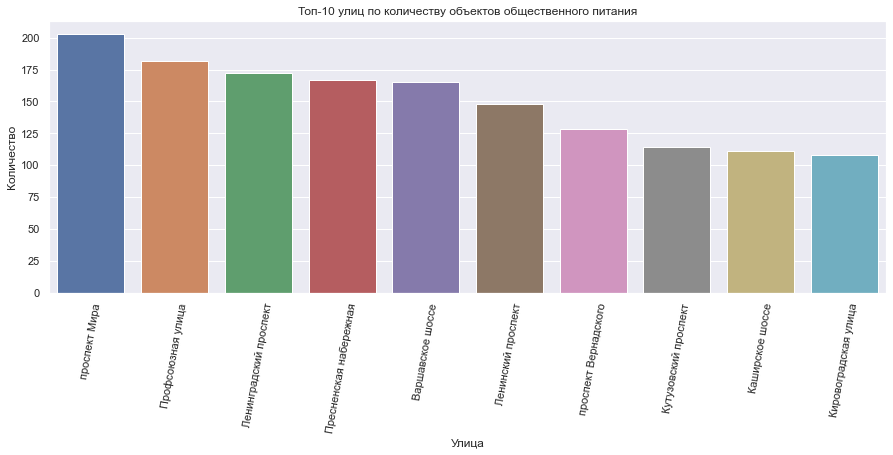

In [45]:
# строим график
plt.figure(figsize=(15, 5))
sns.barplot(x = 'street', y = 'id',  data=new_table1, ci=None) 
plt.title("Топ-10 улиц по количеству объектов общественного питания")
plt.xlabel("Улица")
plt.ylabel("Количество")
plt.xticks(rotation = 80) 
plt.show()

Теперь найдем районы, в которых расположены эти улицы.

In [46]:
spreadsheet_id = '1iCFEn8LtgHjjPnPR1Dllx47nQHc4-eeDeYi5gyUqUGU'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
df = pd.read_csv(BytesIO(r.content))
df = df.rename(columns={'streetname': 'street'})
df

street  areaid okrug               area
0                Выставочный переулок      17   ЦАО  Пресненский район
1                        улица Гашека      17   ЦАО  Пресненский район
2             Большая Никитская улица      17   ЦАО  Пресненский район
3                   Глубокий переулок      17   ЦАО  Пресненский район
4     Большой Гнездниковский переулок      17   ЦАО  Пресненский район
...                               ...     ...   ...                ...
4393              Вознесенский проезд      17   ЦАО  Пресненский район
4394                  Волков переулок      17   ЦАО  Пресненский район
4395                  Поварская улица      17   ЦАО  Пресненский район
4396               Кудринская площадь      17   ЦАО  Пресненский район
4397               Вспольный переулок      17   ЦАО  Пресненский район

[4398 rows x 4 columns]

Найдем, на каких районах расположены улицы. Сначала найдем топ-10 улиц, затем отсечем лишнее, а потом объединим их, сгруппировав по улице, району, округу и id округа, чтобы раздробить количество завдений для каждого района.

In [47]:
#объединяем таблицы с районами и улицами
new_table2 = rest_data.groupby('street', as_index=False)['id'].count().sort_values(by = 'id', ascending = False)['street'].head(10)
new_table3 = rest_data.query('street in @new_table2')
data_2 = new_table3.merge(df, on='street', how='left')
data_3 = data_2.groupby(['street', 'areaid','okrug', 'area'], as_index=False)['id'].count().sort_values(by = 'id', ascending = False)
data_3 = data_3.drop(['id'], axis = 1)
data_3

street  areaid okrug                             area
47           проспект Мира      86  СВАО                Ярославский Район
46           проспект Мира      82  СВАО                   Район Свиблово
45           проспект Мира      81  СВАО                  Район Ростокино
44           проспект Мира      79  СВАО               Останкинский район
43           проспект Мира      78  СВАО               Район Марьина роща
42           проспект Мира      70  СВАО               Алексеевский район
41           проспект Мира      16   ЦАО                  Мещанский район
32       Профсоюзная улица     129  ЮЗАО                Обручевский район
30       Профсоюзная улица     123  ЮЗАО              Академический район
31       Профсоюзная улица     126  ЮЗАО                   Район Коньково
34       Профсоюзная улица     132  ЮЗАО                  Район Черемушки
33       Профсоюзная улица     131  ЮЗАО                Район Теплый Стан
35       Профсоюзная улица     134  ЮЗАО                    Район Ясенево
19  Ленинградский проспект      66   САО                      Район Сокол
20  Ленинградский проспект      69   САО                Хорошевский район
17  Ленинградский проспект      54   САО                   Район Аэропорт
18  Ленинградский проспект      55   САО                    Район Беговой
29  Пресненская набережная      17   ЦАО                Пресненский район
1         Варшавское шоссе     102   ЮАО         Район Нагатино-Садовники
0         Варшавское шоссе      99   ЮАО                    Донской район
3         Варшавское шоссе     108   ЮАО         Район Чертаново Северное
7         Варшавское шоссе     133  ЮЗАО               Район Южное Бутово
2         Варшавское шоссе     104   ЮАО                   Нагорный район
6         Варшавское шоссе     130  ЮЗАО            Район Северное Бутово
5         Варшавское шоссе     110   ЮАО            Район Чертаново Южное
4         Варшавское шоссе     109   ЮАО      Район Чертаново Центральное
28      Ленинский проспект     131  ЮЗАО                Район Теплый Стан
21      Ленинский проспект      21   ЦАО                   Район Якиманка
24      Ленинский проспект      99   ЮАО                    Донской район
27      Ленинский проспект     129  ЮЗАО                Обручевский район
26      Ленинский проспект     128  ЮЗАО              Ломоносовский район
25      Ленинский проспект     124  ЮЗАО                Район Гагаринский
23      Ленинский проспект      47   ЗАО         Район Тропарево-Никулино
22      Ленинский проспект      44   ЗАО       Район Проспект Вернадского
39    проспект Вернадского     124  ЮЗАО                Район Гагаринский
40    проспект Вернадского     128  ЮЗАО              Ломоносовский район
36    проспект Вернадского      44   ЗАО       Район Проспект Вернадского
37    проспект Вернадского      45   ЗАО                    Район Раменки
38    проспект Вернадского      47   ЗАО         Район Тропарево-Никулино
16    Кутузовский проспект      49   ЗАО             Район Фили-Давыдково
15    Кутузовский проспект      38   ЗАО               Район Дорогомилово
8          Каширское шоссе     101   ЮАО       Район Москворечье-Сабурово
10         Каширское шоссе     105   ЮАО  Район Орехово-Борисово Северное
11         Каширское шоссе     106   ЮАО     Район Орехово-Борисово Южное
9          Каширское шоссе     102   ЮАО         Район Нагатино-Садовники
12    Кировоградская улица     108   ЮАО         Район Чертаново Северное
13    Кировоградская улица     109   ЮАО      Район Чертаново Центральное
14    Кировоградская улица     110   ЮАО            Район Чертаново Южное

Посмотрим на размер улиц.

In [48]:
#размер улиц
data_3.groupby('street', as_index=False)['area'].count().sort_values(by = 'area', ascending = False)


street  area
0        Варшавское шоссе     8
5      Ленинский проспект     8
9           проспект Мира     7
7       Профсоюзная улица     6
8    проспект Вернадского     5
1         Каширское шоссе     4
4  Ленинградский проспект     4
2    Кировоградская улица     3
3    Кутузовский проспект     2
6  Пресненская набережная     1

Мы видим, что самыми большими улицами являются - Варшавское шоссе и Ленинский проспект. При этом по количеству заведений они находятся не на первом месте. Проспект Мира и Профсоюзная улица, занимающие 1 и 2 место соответсвенно так же являются довольно большими, но не самыми. Самые небольшие улицы - Пресненская набережная и Кутузовский проспект. При этом они находятся примерно в середине топа по количеству заведений на одну улицу.

In [49]:
#посмотрим на районы
area_group = data_2.groupby('street', as_index=False)['id'].count().sort_values(by = 'id', ascending = False)
area_group

street    id
9           проспект Мира  1421
0        Варшавское шоссе  1320
5      Ленинский проспект  1184
7       Профсоюзная улица  1092
4  Ленинградский проспект   688
8    проспект Вернадского   640
1         Каширское шоссе   444
2    Кировоградская улица   324
3    Кутузовский проспект   228
6  Пресненская набережная   167

Мы видим, что очень много районов имеют общие улицы, на что указывают одинаковое количество заведений. При этом Район Теплый Стан и Обручевский район захватывают улицы с довольно значительным числом количеством заведений, чего не скажешь о Районе Орехово-Борисово Северное,	Районе Москворечье-Сабурово	и Районе Орехово-Борисово Южное. Это поможет нам в дальнейшем для определения наиболее привлекательного района.

### Вывод:

Мы видим, что большая часть объектов среди топ-10 улиц по количеству объектов лидирует Улица Мира, на которое расположено 204 заведения (13.5% от топ-10). Улица Мира расположена сразу в 7 районах(Ярославский Район, Район Свиблово, Район Ростокино, Останкинский район, Район Марьина роща, Алексеевский район, Мещанский район). Следом идет Профсоюзная улица с 183 заведения (12.1%). Она расположилась в 5 районах (Обручевский район, Академический район, Район Коньково, Район Черемушки, Район Теплый Стан, Район Ясенево). Среди топ-10 худший результат показала Кировоградская улица, на которой находится 110 заведений (7.29%). Она расположена в 3 районах (Район Чертаново Северное, Район Чертаново Центральное, Район Чертаново Южное).

## Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?
<a id='nine'></a>

Сначала сгруппируем данные по улице и рассчитаем количество заведений для каждой улицы. Затем сделаем срез данных, где количество заведений будет равняться 1.

In [50]:
#ищем нужные улицы
new_table5 = rest_data.groupby('street', as_index=False)['id'].count().query('id == 1')
new_table5

street  id
0          1-я Ватутинская улица   1
2          2-я Барышевская улица   1
5                Армейская улица   1
7      Большая Октябрьская улица   1
8                  Высокая улица   1
...                          ...  ..
2092              улица Шеногина   1
2095              улица Шумилова   1
2096               улица Шумкина   1
2100                 улица Щорса   1
2105                шоссе Фрезер   1

[697 rows x 2 columns]

Как итог - 697 улиц имеют только одно заведение.

Посмотрим, на районы.

In [51]:
#объединяем таблицы с районами и улицами
new = rest_data.groupby('street', as_index=False)['id'].count().query('id == 1')['street']
new2 = rest_data.query('street in @new')
new3 = new2.merge(df, on='street', how='left')
new4 = new3.groupby(['area'], as_index=False)['id'].count().sort_values(by = 'id', ascending = False)
new4 

area  id
96       Таганский район  27
82       Район Хамовники  26
3        Басманный район  25
21     Пресненский район  20
97        Тверской район  20
..                   ...  ..
37      Район Ивановское   1
47    Район Левобережный   1
80  Район Филевский Парк   1
78        Район Строгино   1
51         Район Марфино   1

[102 rows x 2 columns]

697 улиц расположены в 102 районах. Некоторые улицы находятся в нескольких районах. Посмотрим только на те районы, в которых расположена только одна улица и соответветснно - 1 заведение.

In [52]:
#выводим датасет
new4.tail(21)

area  id
43               Район Крюково   1
58    Район Нагатино-Садовники   1
57  Район Москворечье-Сабурово   1
55          Район Метрогородок   1
15        Молжаниновский район   1
18           Обручевский район   1
53               Район Марьино   1
1           Алтуфьевский район   1
49             Район Лианозово   1
29             Район Восточный   1
90      Район Южное Медведково   1
31           Район Гагаринский   1
87       Район Чертаново Южное   1
86    Район Чертаново Северное   1
84              Район Царицыно   1
35     Район Западное Дегунино   1
37            Район Ивановское   1
47          Район Левобережный   1
80        Район Филевский Парк   1
78              Район Строгино   1
51               Район Марфино   1

Нассчитываем около 21 бедных на заведения районов.

### Вывод:

Мы рассчитали, что в Москве около `697` улиц с одним только заведением и `21` район только с 1 улицей и 1 заведением, и всего `102` района, в которых расположены улицы с 1 заведением (однако улицы могут находиться в нескольких районах).

## Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?
<a id='ten'></a>

Сгруппируем данные с самым большим количеством объектов общественного питания по улицам и найдем сумму посадочных мест для каждой улицы.

In [53]:
#ищем суммы посадочных мест для улиц
num_df = new_table3.groupby(['street'], as_index=False)['number'].sum().sort_values(by = 'number', ascending = False)
#выводим датасет
num_df

street  number
9           проспект Мира   12790
3    Кутузовский проспект    9697
5      Ленинский проспект    9346
4  Ленинградский проспект    9002
8    проспект Вернадского    8807
7       Профсоюзная улица    8667
0        Варшавское шоссе    8626
6  Пресненская набережная    7656
2    Кировоградская улица    6457
1         Каширское шоссе    6161

Найдем среднее количество посадочных мест для одного заведения, поделив сумму посадочных мест на количество заведений.

In [54]:
common_df = num_df.merge(new_table1, on='street')
common_df['connection'] = round(common_df['number'] / common_df['id']).astype('int')
common_df2 = common_df.sort_values(by = 'connection', ascending = False)
common_df2

street  number   id  connection
1    Кутузовский проспект    9697  114          85
4    проспект Вернадского    8807  128          69
0           проспект Мира   12790  203          63
2      Ленинский проспект    9346  148          63
8    Кировоградская улица    6457  108          60
9         Каширское шоссе    6161  111          56
3  Ленинградский проспект    9002  172          52
6        Варшавское шоссе    8626  165          52
5       Профсоюзная улица    8667  182          48
7  Пресненская набережная    7656  167          46

In [55]:
#среднее число мест
common_df2['connection'].mean()

59.4

Мы видим, что в самых застроенных заведениями улицах среднее количество посадочных мест для одного заведения примерно равно 60.

Посмотрим на распределение количества посадочных мест от количества заведений.

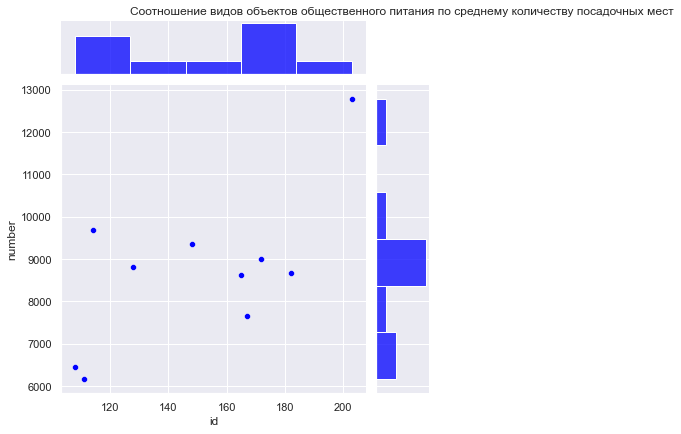

In [56]:
#распределение
sns.jointplot(x='id', y='number', data=common_df2, color='blue') 
plt.title("Cоотношение видов объектов общественного питания по среднему количеству посадочных мест", pad =70)
plt.xlabel("Количество")
plt.ylabel("Вид объекта")
plt.xticks(rotation = 80) 
plt.show()

Мы видим, что количество посадочных мест зависист от количества заведений. Посмотрим на коэффициент корреляции, чтобы убедиться в данном тезисе.

In [57]:
#рассчитываем коэффициент корреляции
common_df2[['number', 'id']].corr()

number        id
number  1.000000  0.646817
id      0.646817  1.000000

Так и есть, количество посадочных мест зависит от количества заведений на улицах.

Посмотрим так же на улицы с самым большим количеством посадочных мест и сравним их с улицами с самым большим количество заведений.

In [58]:
#посмотрим на улицы с самым большим количеством поасадочных мест
num_df2 = rest_data.groupby(['street'], as_index=False)['number'].sum().sort_values(by = 'number', ascending = False).head(10)
num_df2

street  number
1654           проспект Мира   12790
772     Кутузовский проспект    9697
784       Ленинский проспект    9346
781   Ленинградский проспект    9002
1650    проспект Вернадского    8807
1102       Профсоюзная улица    8667
499         Варшавское шоссе    8626
1085  Пресненская набережная    7656
662       Измайловское шоссе    6934
702     Кировоградская улица    6457

Теперь сравниваем.

In [59]:
#посмотрим, как много улиц совпадают
num_df2.merge(new_table1, on='street')

street  number   id
0           проспект Мира   12790  203
1    Кутузовский проспект    9697  114
2      Ленинский проспект    9346  148
3  Ленинградский проспект    9002  172
4    проспект Вернадского    8807  128
5       Профсоюзная улица    8667  182
6        Варшавское шоссе    8626  165
7  Пресненская набережная    7656  167
8    Кировоградская улица    6457  108

Мы видим, что 9 из 10 улиц с самым большим количеством заведений имеет самое большое количество посадочных мест. 

### Вывод:

Мы посмотрели на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания и выяснили, что количество посадочных мест на улице зависит от количества заведений на этой улице. Так же мы выяснили, что среднее количество посадочных мест для одного заведения на 10 улицах с самым большим количество заведений примерно равно 60.

# Общий вывод
<a id='eleven'></a>

На данном этапе нам необходимо подвести итог всем вышесделанным исследованиям и дать рекомендации о виде заведения, количестве посадочных мест, а также районе расположения. Также необхиодимо прокомментировать возможность развития сети.
Напомним, что мы решили открыть небольшое кафе в Москве. Основная идея заключается в том, что гостей должны обслуживать роботы. Реализация проекта выглядит довольно дорого.

**Рекомендации:**

`Рекомендация №1:`

Мы проанализировали соотношение видов объектов общественного питания по количеству.

Сделав это мы заметили, что около 40% всех заведений в Москве - это кафе. Это означает, что при открытии кафе негативным фактором будет безумная конкуренция, что довольно плохо. Однако нам на руку играет сама идея использования роботов, использованием которых из всех 6 тысяч кафе в Москве немногие смогут похвастаться. Поэтому нам нужно делать опору именно на использование роботов и продвигать данную тему в маркетинге. Так, мы сможем невилировать большую конкуренцию.

`Рекомендация №2:`

Мы исследовали соотношение сетевых и несетевых заведений по количеству.

Нас интересуют кафе. Сделав это мы заметили, что около 77% всех кафе являются несетевыми, что довольно много. А учитывая то, что мы собираемся сделать заведение небольшим и уникальным, то возможно ситуация, когда места в кафе будет не хватать, возникнет давка или просто потеряем часть клиентов. Поэтому предлагается открыть 2-3 сетевых заведения в различных интересных районах. Так, мы сможем охватить большее количество клиентов, невелировать размеры кафе и сыграть на том, что сетевых заведений меньше. Это сыграет нам на руку, поскольку несетевые заведения, которые являются эксклюзивными и оригинальными, вероятнее всего уже насытили пользователей и являются более локальными и предназначены для узкого числа клиентов. Поэтому сетевые заведения с эксклюзивной идеей - наш выбор!

`Рекомендация №3:`

Мы выяснили,  для сетевых заведений характерно мало заведений с большим числом посадочных мест в каждом заведении. Для кафе это соотношение примерно составляет 1 к 3. Также мы выяснили, что для кафе характерно в среднем 39 посадочных мест. Чаще всего сетевые кафе имют от 20 до 50 посадочных мест. Данный вариант посадочных мест является оптимальным и "рабочим" для всех кафе, поэтому он выглядит довольно привлекательным. Опираясь на эти данные можно будет открыть кафе с 40-50 посадочными местами. Так мы получим среднестатистическое количетсво посадочных мест, которое имеет практически каждое кафе и одновременно войдем в число более редких (хоть и не очень сильно редких) кафе (свыше среднего количества посадочных мест для кафе - свыше 39 ). Это подчеркнет нашу эксклюзивность и одновременно выделит на фоне остальных. 



`Рекомендация №4:`

Мы изучили улицы, на которых расположены заведения и рассмотрели улицы с самым большим количеством заведений и с самым маленьким. Также мы нашли районы, в которых расположены эти улицы. Открывать кафе в районе и улице с единичными заведениями представляется не лучшей идеей, поскольку районы с небольшим количеством заведений являются не самыми проходимыми и не легко доступными, поэтому их мы исключаем. Будем рассматривать только районы и улицы из топ-10 по количеству заведений. Нам не нужны самые заселенные заведениями районы и улицы, поэтому нам нужно брать районы и улицы с 4-7 мест, поскольку это довольно привлекательные районы, аренда здания будет не самая дорогая в сравнении с местами 1-3, но и сами улицы и районы расположены близко к центру и часто проходимым местам.

Проанализировав расположение улиц, можно выделить самые привлекательные и интересные для расположения кафе:

1) Пресненская набережная (более привлекательный - Пресненский район) (в среднем 46 посадочных мест для всех типов заведений)

2) Ленинский проспект (более привлекательный - Район Якиманка) (в среднем 63 посадочных места для всех типов заведений)

3) Кутузовский проспект (более привлекательный - Район Дорогомилово) (в среднем 85 посадочных места для всех типов заведений) 

4) проспект Вернадского (более привлекательный - Район Гагаринский) (в среднем 67 посадочных места для всех типов заведений) 

# Презентация 
<a id='twelve'></a>

Также была подготовлена презентация исследования для инвесторов.

Чтобы увидеть презентацию, нужно нажать на эту кнопочку -  [ТЫК](https://docs.google.com/presentation/d/1_x8HDhIVQhsDL1ovo3UBa53qNTU9jrlJT4TSm8_ZjZc/edit?usp=sharing)